In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import sys
import numpy
import matplotlib.pyplot as plt
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from datetime import datetime

In [45]:
roe_g=pd.read_excel('global companies roe.xlsx')

In [46]:
roe_g = roe_g.dropna()

In [4]:
roe_g['Year'] = pd.to_datetime(roe_g['Year'].astype(int), format='%Y')

In [47]:
roe_g

,Company,Year,Net income,Revenue,Net profit margin,Avg Total assets,Asset turnover,Avg shareholder equity,Equity multiplier,ROE
0,Siemens,2014.0,5621.037,99564.770,0.056456,165364.400,0.602093,40732.0800,4.059807,13.800024
1,Siemens,2015.0,8367.018,86905.770,0.096277,147605.600,0.588770,39467.0900,3.739967,21.199987
2,Siemens,2016.0,6108.210,88341.130,0.069143,140900.200,0.626977,14271.4300,9.872886,42.800266
3,Siemens,2017.0,6669.632,91760.840,0.072685,138279.900,0.663588,45065.1300,3.068446,14.799984
4,Siemens,2018.0,6912.653,98855.580,0.069927,133750.200,0.739106,63419.0200,2.108992,10.899968
5,Siemens,2019.0,5648.000,86849.000,0.065032,150248.000,0.578038,50984.0000,2.946964,11.077985
7,GE energy,2014.0,15233.000,117184.000,0.129992,654954.000,0.178919,161880.0000,4.045923,9.410057
8,GE energy,2015.0,-6145.000,117386.000,-0.052349,493071.000,0.238071,614515.2100,0.802374,-0.999975
9,GE energy,2016.0,6845.000,119469.000,0.057295,365183.000,0.327148,100072.6600,3.649179,6.840030
10,GE energy,2017.0,8920.000,118243.000,0.075438,369245.000,0.320229,106444.0596,3.468911,8.379989


In [48]:
pd.to_numeric(roe_g['ROE'])

0       13.800024
1       21.199987
2       42.800266
3       14.799984
4       10.899968
5       11.077985
7        9.410057
8       -0.999975
9        6.840030
10       8.379989
11     -12.620218
12     -18.214393
14      11.770026
15      13.730041
16      12.089997
17      15.260013
18      27.489991
19       9.112669
21       4.750007
22      18.589984
23      24.140027
24      34.809976
25      26.690000
26      22.157434
28       9.119980
29       4.609999
30      15.660087
31     -10.869337
32      -1.729872
33      -2.255018
          ...    
69       3.299978
70       1.090166
71       0.139997
72      -0.389879
73      -0.270044
74       0.188074
76      24.238008
77      18.180071
78      34.312781
79      16.679944
80      27.770521
81      18.055244
83     -52.524462
84     -18.820421
85     -82.846617
86    -961.531915
87     216.115242
88      59.199447
90       9.150046
91       5.440001
92      13.130060
93       8.230044
94      13.140098
95       5.813278
97      -0

In [50]:
subset=roe_g
subset['roe_p']=(roe_g['ROE']/ roe_g['ROE'].shift(1))-1
subset

,Company,Year,Net income,Revenue,Net profit margin,Avg Total assets,Asset turnover,Avg shareholder equity,Equity multiplier,ROE,roe_p
0,Siemens,2014.0,5621.037,99564.770,0.056456,165364.400,0.602093,40732.0800,4.059807,13.800024,NaN
1,Siemens,2015.0,8367.018,86905.770,0.096277,147605.600,0.588770,39467.0900,3.739967,21.199987,0.536228
2,Siemens,2016.0,6108.210,88341.130,0.069143,140900.200,0.626977,14271.4300,9.872886,42.800266,1.018882
3,Siemens,2017.0,6669.632,91760.840,0.072685,138279.900,0.663588,45065.1300,3.068446,14.799984,-0.654208
4,Siemens,2018.0,6912.653,98855.580,0.069927,133750.200,0.739106,63419.0200,2.108992,10.899968,-0.263515
5,Siemens,2019.0,5648.000,86849.000,0.065032,150248.000,0.578038,50984.0000,2.946964,11.077985,0.016332
7,GE energy,2014.0,15233.000,117184.000,0.129992,654954.000,0.178919,161880.0000,4.045923,9.410057,-0.150562
8,GE energy,2015.0,-6145.000,117386.000,-0.052349,493071.000,0.238071,614515.2100,0.802374,-0.999975,-1.106267
9,GE energy,2016.0,6845.000,119469.000,0.057295,365183.000,0.327148,100072.6600,3.649179,6.840030,-7.840199
10,GE energy,2017.0,8920.000,118243.000,0.075438,369245.000,0.320229,106444.0596,3.468911,8.379989,0.225139


In [51]:
subset2= subset.dropna()
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(subset2)
subs=subset2[subset2.Year != 2014.0]

In [52]:
# subs['Year'] = pd.to_datetime(subs['Year'].astype(int), format='%Y')
subs

,Company,Year,Net income,Revenue,Net profit margin,Avg Total assets,Asset turnover,Avg shareholder equity,Equity multiplier,ROE,roe_p
1,Siemens,2015.0,8367.018,86905.770,0.096277,147605.600,0.588770,39467.0900,3.739967,21.199987,0.536228
2,Siemens,2016.0,6108.210,88341.130,0.069143,140900.200,0.626977,14271.4300,9.872886,42.800266,1.018882
3,Siemens,2017.0,6669.632,91760.840,0.072685,138279.900,0.663588,45065.1300,3.068446,14.799984,-0.654208
4,Siemens,2018.0,6912.653,98855.580,0.069927,133750.200,0.739106,63419.0200,2.108992,10.899968,-0.263515
5,Siemens,2019.0,5648.000,86849.000,0.065032,150248.000,0.578038,50984.0000,2.946964,11.077985,0.016332
8,GE energy,2015.0,-6145.000,117386.000,-0.052349,493071.000,0.238071,614515.2100,0.802374,-0.999975,-1.106267
9,GE energy,2016.0,6845.000,119469.000,0.057295,365183.000,0.327148,100072.6600,3.649179,6.840030,-7.840199
10,GE energy,2017.0,8920.000,118243.000,0.075438,369245.000,0.320229,106444.0596,3.468911,8.379989,0.225139
11,GE energy,2018.0,-22802.000,121615.000,-0.187493,309129.000,0.393412,180678.3400,1.710936,-12.620218,-2.505995
12,GE energy,2019.0,-5439.000,95214.000,-0.057124,266048.000,0.357883,29861.0000,8.909548,-18.214393,0.443271


In [39]:
subs

,Company,Year,Net income,Revenue,Net profit margin,Avg Total assets,Asset turnover,Avg shareholder equity,Equity multiplier,ROE(%),roe_p


In [25]:
subset_group2=subs.groupby(subset2['Company'])

In [26]:
df_z=subset_group2.mean()
df_z

,Net income,Revenue,Net profit margin,Avg Total assets,Asset turnover,Avg shareholder equity,Equity multiplier,ROE(%),roe_p
Company,,,,,,,,,


In [11]:
df_z2=df_z['roe_p']
subset_cluster = df_z2.as_matrix()
subset_cluster

C:\Users\rachit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([ -0.3296492 ,   0.61267974,   0.17171075,  -4.18841812,
        -0.24045757,  -1.25930969,   1.84665034,  -0.25816499,
        -2.27275751,  -0.16438523,   0.05478124,  -5.98398617,
         0.15934517, -16.82376772,   0.51875212])

In [12]:
subset_cluster_2=subset_cluster.reshape(-1,1)

In [13]:
subset_cluster_2

array([[ -0.3296492 ],
       [  0.61267974],
       [  0.17171075],
       [ -4.18841812],
       [ -0.24045757],
       [ -1.25930969],
       [  1.84665034],
       [ -0.25816499],
       [ -2.27275751],
       [ -0.16438523],
       [  0.05478124],
       [ -5.98398617],
       [  0.15934517],
       [-16.82376772],
       [  0.51875212]])

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(subset_cluster_2)

In [15]:
kmeans.cluster_centers_

array([[  0.23712624],
       [-16.82376772],
       [ -5.08620215],
       [ -1.7660336 ]])

In [16]:
df_z['Clusters']=kmeans.labels_

In [17]:
df_z

,ROE,roe_p,Clusters
Company,,,
Berkshire Hathaway Energy (BHE),9.3980,-0.329649,0
Xcel Energy,10.0360,0.612680,0
American Electric Power (AEP),9.0220,0.171711,0
Atlantica Yield,-2.3520,-4.188418,2
Avangrid renewables,3.5925,-0.240458,0
Brookfield Renewable Partners,0.7740,-1.259310,3
Enphase Energy,-179.6320,1.846650,0
First solar,3.3580,-0.258165,0
GE energy,2.2020,-2.272758,3


In [18]:
df_z.reset_index(level='Company', inplace=True)      

In [19]:
for cluster,company in zip(df_z.Clusters, df_z.Company):
    if (cluster==0):
        print(company)

 Berkshire Hathaway Energy (BHE)
 Xcel Energy
American Electric Power (AEP)
Avangrid renewables
Enphase Energy
First solar
Nextra energy
Ormat Technologies
Siemens
Vestas wind system


In [20]:
for cluster,company in zip(df_z.Clusters, df_z.Company):
    if (cluster==1):
        print(company)

SolarEdge Technologies


In [21]:
for cluster,company in zip(df_z.Clusters, df_z.Company):
    if (cluster==2):
        print(company)

Atlantica Yield
Pacific Ethanol



In [22]:
for cluster,company in zip(df_z.Clusters, df_z.Company):
    if (cluster==3):
        print(company)

Brookfield Renewable Partners
GE energy


In [55]:
subs['Year'] = pd.to_datetime(subs['Year'].astype(int), format='%Y')

C:\Users\rachit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
subs

,Year,Net income,Revenue,Net profit margin,Avg Total assets,Asset turnover,Avg shareholder equity,Equity multiplier,ROE,roe_p
Company,,,,,,,,,,
Siemens,2015-01-01,8367.018,86905.770,0.096277,147605.600,0.588770,39467.0900,3.739967,21.199987,0.536228
Siemens,2016-01-01,6108.210,88341.130,0.069143,140900.200,0.626977,14271.4300,9.872886,42.800266,1.018882
Siemens,2017-01-01,6669.632,91760.840,0.072685,138279.900,0.663588,45065.1300,3.068446,14.799984,-0.654208
Siemens,2018-01-01,6912.653,98855.580,0.069927,133750.200,0.739106,63419.0200,2.108992,10.899968,-0.263515
Siemens,2019-01-01,5648.000,86849.000,0.065032,150248.000,0.578038,50984.0000,2.946964,11.077985,0.016332
GE energy,2015-01-01,-6145.000,117386.000,-0.052349,493071.000,0.238071,614515.2100,0.802374,-0.999975,-1.106267
GE energy,2016-01-01,6845.000,119469.000,0.057295,365183.000,0.327148,100072.6600,3.649179,6.840030,-7.840199
GE energy,2017-01-01,8920.000,118243.000,0.075438,369245.000,0.320229,106444.0596,3.468911,8.379989,0.225139
GE energy,2018-01-01,-22802.000,121615.000,-0.187493,309129.000,0.393412,180678.3400,1.710936,-12.620218,-2.505995


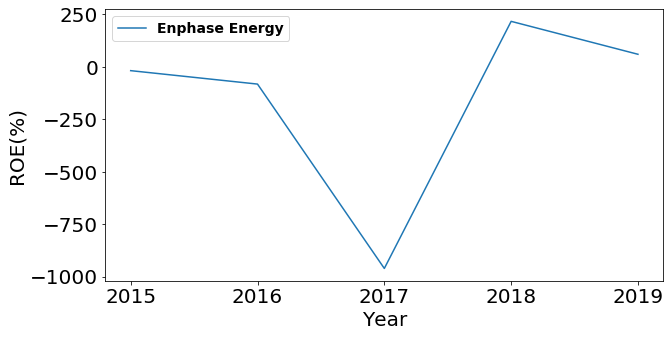

In [72]:
#  subs.set_index('Company',inplace=True)

plt.figure(figsize=(10,5))
plt.plot(subs.loc['Enphase Energy']['Year'].dt.strftime('%Y'), subs.loc['Enphase Energy']['ROE'], label='Enphase Energy')

plt.ylabel('ROE(%)')
plt.xlabel('Year')
plt.rcParams["font.size"] = "20"
plt.legend(prop={'size': 14,'weight':'bold'})
plt.savefig('enphase.jpeg')

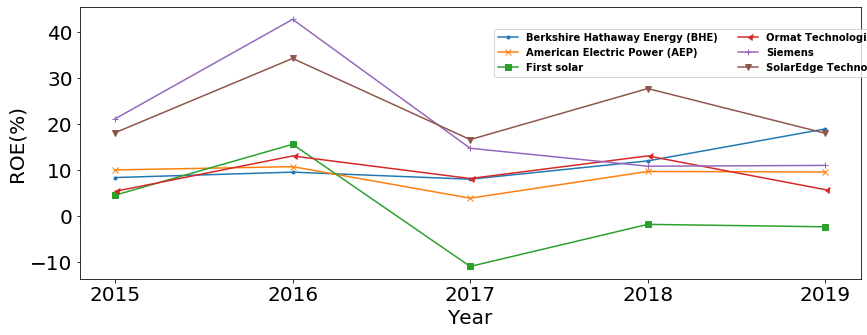

In [67]:
# subset2.set_index('Company',inplace=True)
# ax = plt.gca()
plt.figure(figsize=(14,5))

plt.plot(subs.iloc[29:34]['Year'].dt.strftime('%Y'), subs.iloc[29:34]['ROE'], label='Berkshire Hathaway Energy (BHE)',marker=".")
plt.plot(subs.loc['American Electric Power (AEP)']['Year'].dt.strftime('%Y'), subs.loc['American Electric Power (AEP)']['ROE'], label='American Electric Power (AEP)',marker="x")
plt.plot(subs.loc['First solar']['Year'].dt.strftime('%Y'), subs.loc['First solar']['ROE'], label='First solar',marker="s")
plt.plot(subs.loc['Ormat Technologies']['Year'].dt.strftime('%Y'), subs.loc['Ormat Technologies']['ROE'], label='Ormat Technologies',marker=4)
plt.plot(subs.loc['Siemens']['Year'].dt.strftime('%Y'), subs.loc['Siemens']['ROE'], label='Siemens',marker="+")
plt.plot(subs.loc['SolarEdge Technologies']['Year'].dt.strftime('%Y'), subs.loc['SolarEdge Technologies']['ROE'], label='SolarEdge Technologies',marker="v")


plt.ylabel('ROE(%)')
plt.xlabel('Year')
plt.rcParams["font.size"] = "20"
plt.legend(prop={'size': 10,'weight':'bold'},ncol=2,loc= "lower left", bbox_to_anchor=(1.3, 1), bbox_transform=ax.transAxes)
plt.savefig('f-cluster-1.jpeg')

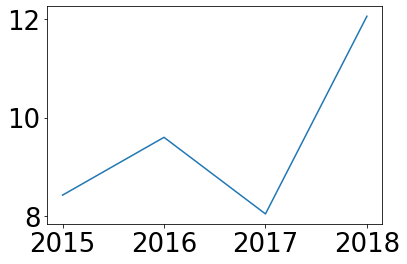

In [107]:
plt.plot(subs.iloc[24:28]['Year'].dt.strftime('%Y'), subs.iloc[24:28]['ROE'], label='Berkshire Hathaway Energy (BHE)')

# subs


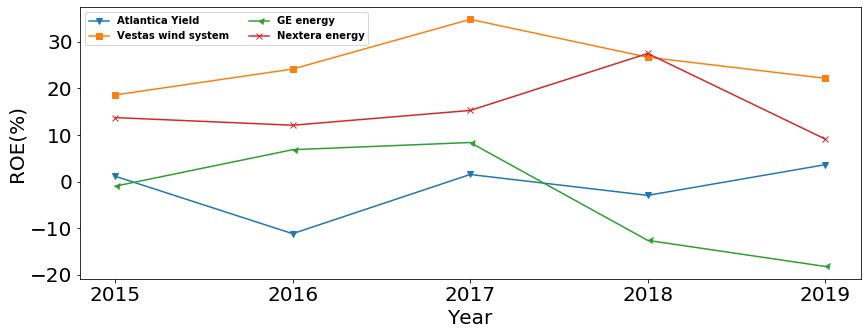

In [70]:
plt.figure(figsize=(14,5))

plt.plot(subs.loc['Atlantica Yield']['Year'].dt.strftime('%Y'), subs.loc['Atlantica Yield']['ROE'], label='Atlantica Yield',marker="v")
plt.plot(subs.loc['Vestas wind system']['Year'].dt.strftime('%Y'), subs.loc['Vestas wind system']['ROE'], label='Vestas wind system',marker="s")
plt.plot(subs.loc['GE energy']['Year'].dt.strftime('%Y'), subs.loc['GE energy']['ROE'], label='GE energy',marker=4)

# plt.plot(subs.loc['Pacific Ethanol\n']['Year'].dt.strftime('%Y'), subs.loc['Pacific Ethanol\n']['ROE'], label='Pacific Ethanol\n',marker="+")
plt.plot(subs.loc['Nextera energy']['Year'].dt.strftime('%Y'), subs.loc['Nextera energy']['ROE'], label='Nextera energy',marker="x")

plt.ylabel('ROE(%)')
plt.xlabel('Year')
plt.rcParams["font.size"] = "20"
plt.legend(loc=2,prop={'size': 10,"weight":"bold"},ncol=2)
plt.savefig('f-cluster_2.jpeg')

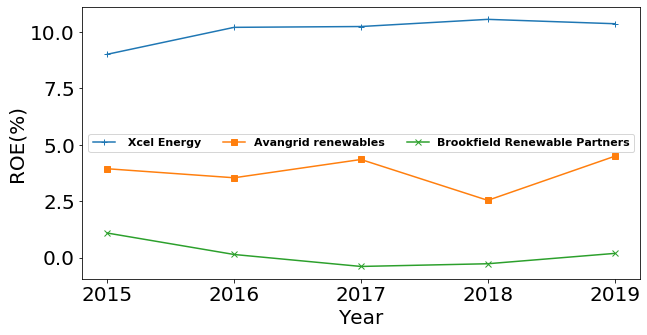

In [71]:
plt.figure(figsize=(10,5))

plt.plot(subs.loc[' Xcel Energy']['Year'].dt.strftime('%Y'), subs.loc[' Xcel Energy']['ROE'], label=' Xcel Energy',marker="+")
plt.plot(subs.loc['Avangrid renewables']['Year'].dt.strftime('%Y'), subs.loc['Avangrid renewables']['ROE'], label='Avangrid renewables',marker="s")
plt.plot(subs.loc['Brookfield Renewable Partners']['Year'].dt.strftime('%Y'), subs.loc['Brookfield Renewable Partners']['ROE'], label='Brookfield Renewable Partners',marker="x")


plt.ylabel('ROE(%)')
plt.xlabel('Year')
plt.rcParams["font.size"] = "20"
plt.legend(prop={'size': 11,"weight":"bold"},ncol=3)
plt.savefig('f_cluster-3.jpeg')

In [75]:
# subset2.set_index('Company',inplace=True)
#  subset2[subset2.Year != 2014.0]
# subset2['Year'] = pd.to_datetime(subset2['Year'].astype(int), format='%Y')
# surveys_df[surveys_df.year != 2002]
subset2

,Company,Year,ROE,roe_p
1,Siemens,2015-01-01,21.20,0.536232
2,Siemens,2016-01-01,42.80,1.018868
3,Siemens,2017-01-01,14.80,-0.654206
4,Siemens,2018-01-01,10.90,-0.263514
6,GE energy,2014-01-01,9.41,-0.136697
7,GE energy,2015-01-01,-1.00,-1.106270
8,GE energy,2016-01-01,6.84,-7.840000
9,GE energy,2017-01-01,8.38,0.225146
10,GE energy,2018-01-01,-12.62,-2.505967
12,Nextra energy,2014-01-01,11.77,-1.932647
